<a href="https://colab.research.google.com/github/dell-datascience/Inage_classifier/blob/main/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from os import listdir
import re
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import seaborn as sb
%config InlineBackend.figure_format = 'retina'
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/research/
%cd '/content/drive/MyDrive/research/frenkel_pairs' 
% ls-l

In [7]:
files=list(listdir('/content/drive/MyDrive/research/frenkel_pairs'))   #Return a list containing the names of the files in the directory
def convert(str):
    return int("".join(re.findall("\d", str)))                     #isolate the digits
files.sort(key=convert)                                            #use digits as key to sort
# files
results_dic={} 
time=[]                                                            #dictionary
vals=[]                                                            #list
for idx in range(0,len(files),1):                                  #loop through all the files
  data=open(files[idx],'r')                                        #open each file
  for line in data:                                                #loop through each line in file
    if line[0]== '#' :continue                                     #skip the header 
    vals.append(int(line.split(" ")[5]))                           #split and take 6 element of each line and append to list
  results_dic[files[idx]]=results_dic.get(files[idx],vals)         #make key and append list to key
  vals=[]                                                          #empty out list
results_dic                                                            
data=open(files[0],'r')
for line in data:
  if line[0]=='#' : continue
  time.append(int(line.split(" ")[1])*.001)                                               

/content/drive/MyDrive/research/graphs


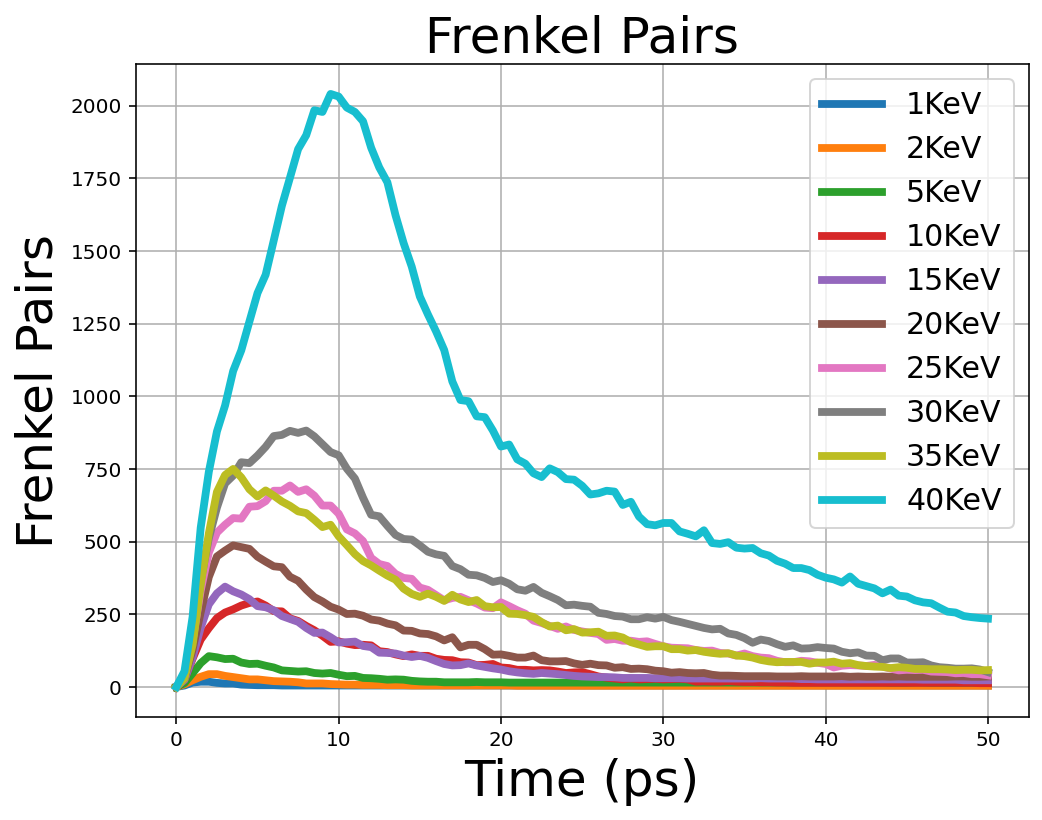

In [23]:
%cd '/content/drive/MyDrive/research/graphs'
labe=sorted(results_dic.keys()) 
fig, ax =plt.subplots(figsize=(8,6))
for key,val in results_dic.items():
   ax.plot(time,results_dic[key],linewidth=3.9, label=key)
   ax.set_xlabel('Time (ps)',fontsize=25)
   ax.set_ylabel('Frenkel Pairs',fontsize=25)
   ax.set_title( 'Frenkel Pairs',fontsize=25)
   ax.legend(facecolor ='white',fontsize=15)
ax.grid(which='major',axis='both')
plt.savefig('frenkel_pairs_graph.png')
plt.show()

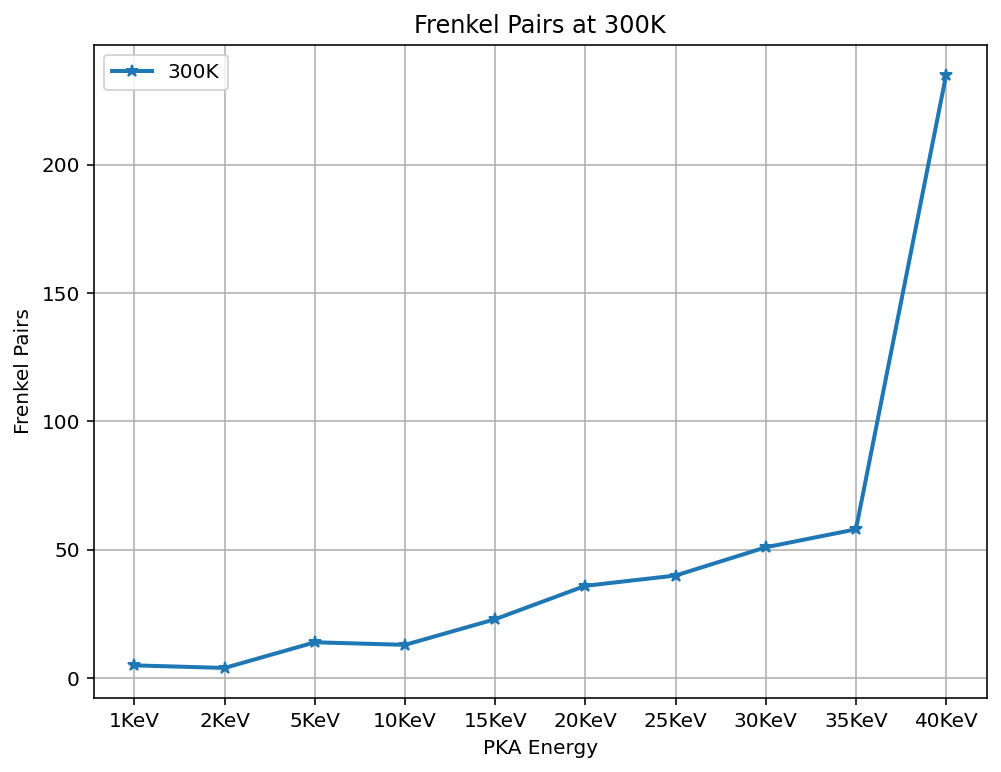

In [ ]:
labe=sorted(results_dic.keys()) 
fig, ax =plt.subplots(figsize=(8,6))
y=[]
x=[]
for key,val in results_dic.items():
  y.append(results_dic[key][-1])
  x.append(key)
ax.plot(x,y, linewidth=2,marker='*', label='300K')
ax.set_xlabel('PKA Energy')
ax.set_ylabel('Frenkel Pairs')
ax.set_title( 'Frenkel Pairs at 300K')
ax.legend(facecolor ='white')
ax.grid(which='Major',axis='both')
plt.savefig('frenkel_pairs_graph.png',dpi=2000)
plt.show()

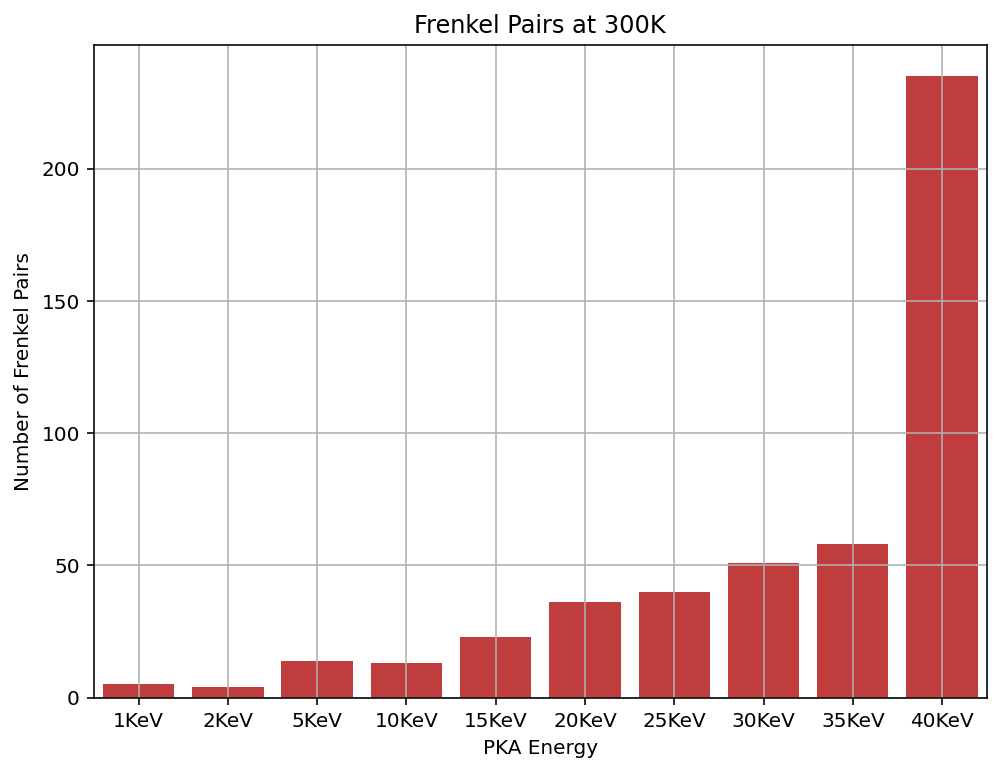

In [ ]:
labe=sorted(results_dic.keys()) 
base=sb.color_palette()[3]
fig, ax =plt.subplots(figsize=(8,6))
y=[]
x=[]
for key,val in results_dic.items():
  y.append(results_dic[key][-1])
  x.append(key)
sb.barplot(x=x,y=y,color=base)
ax.set_xlabel('PKA Energy')
ax.set_ylabel('Number of Frenkel Pairs')
ax.set_title( 'Frenkel Pairs at 300K')
# ax.legend(facecolor ='white')
ax.grid(which='Major',axis='both')
plt.savefig(' bar frenkel_pairs_graph.png',dpi=2000)
plt.show()

/content/drive/MyDrive/research/graphs


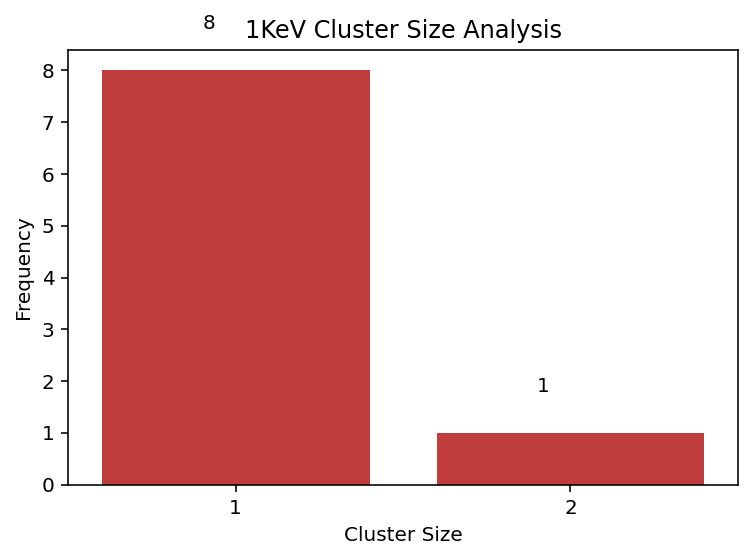

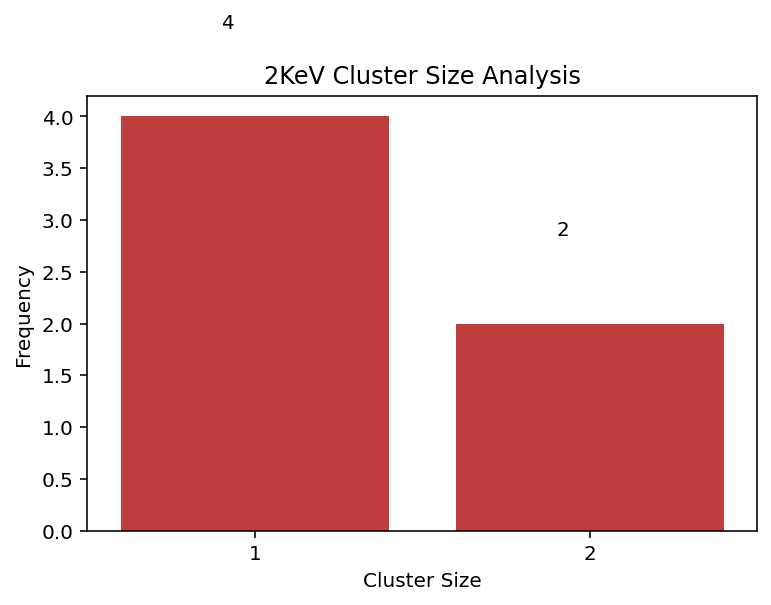

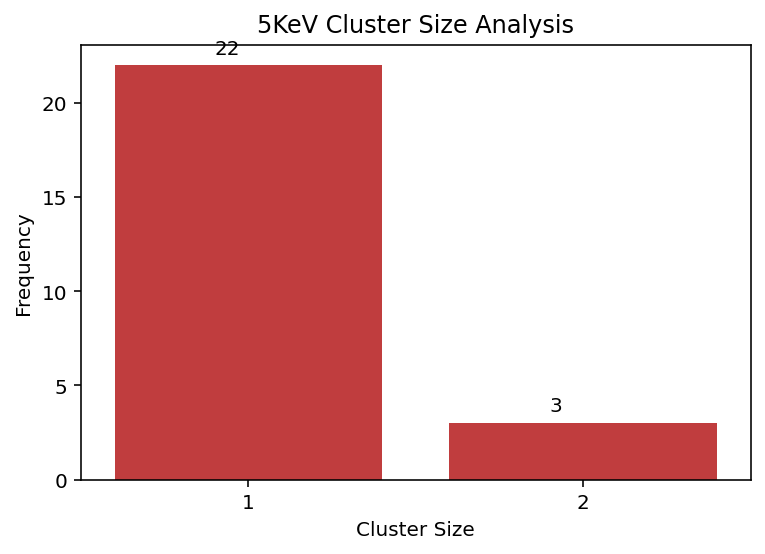

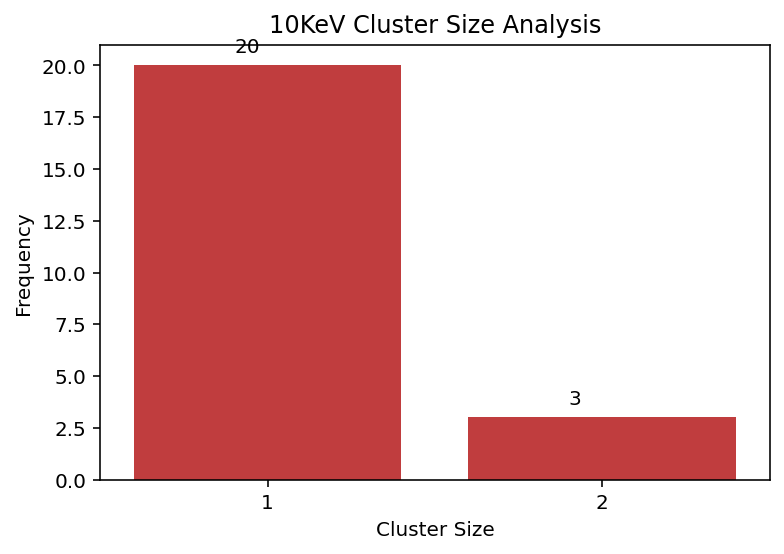

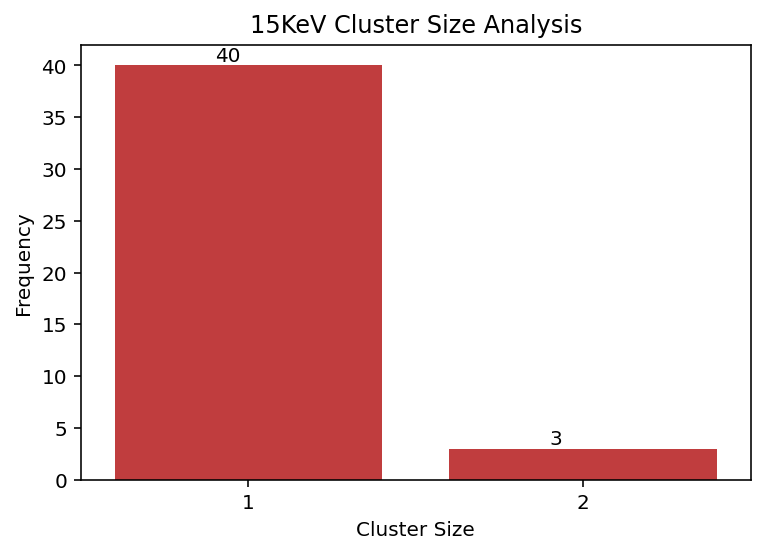

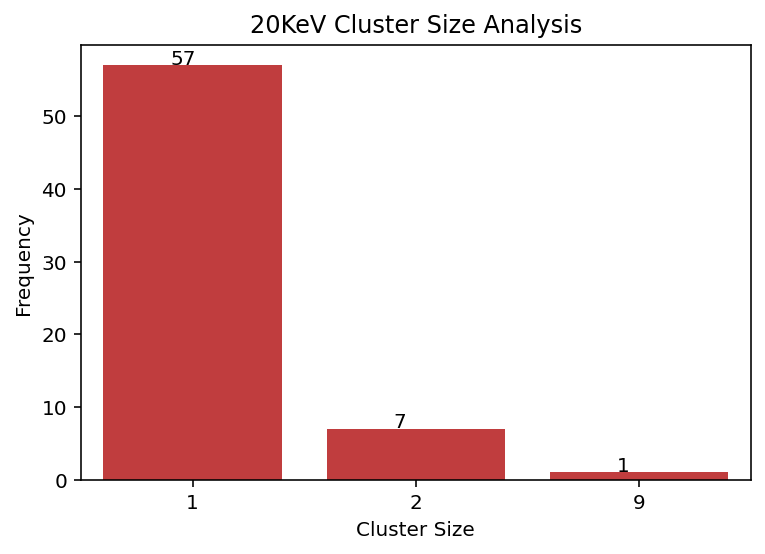

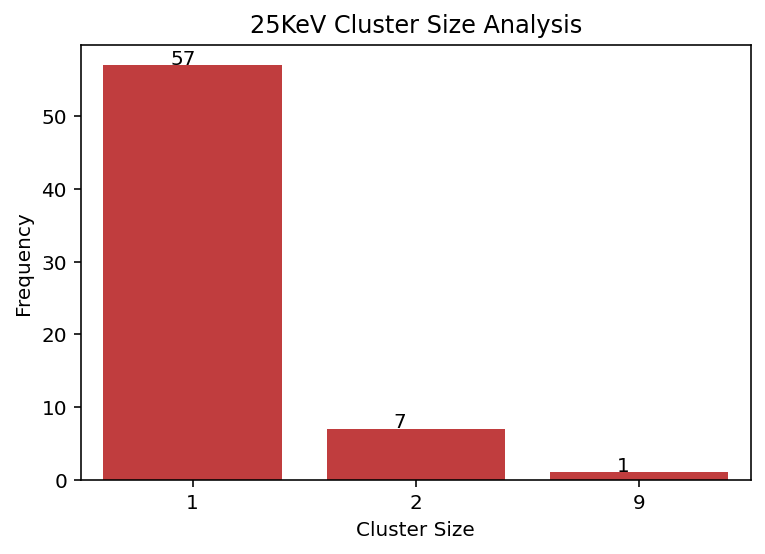

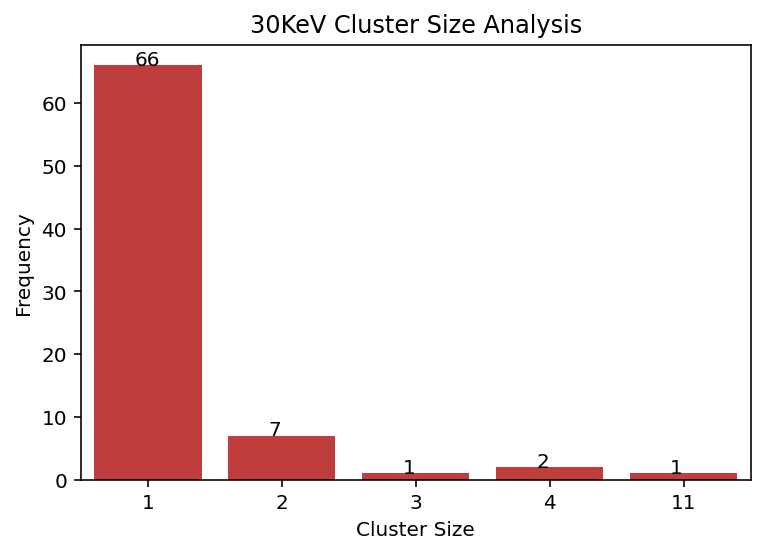

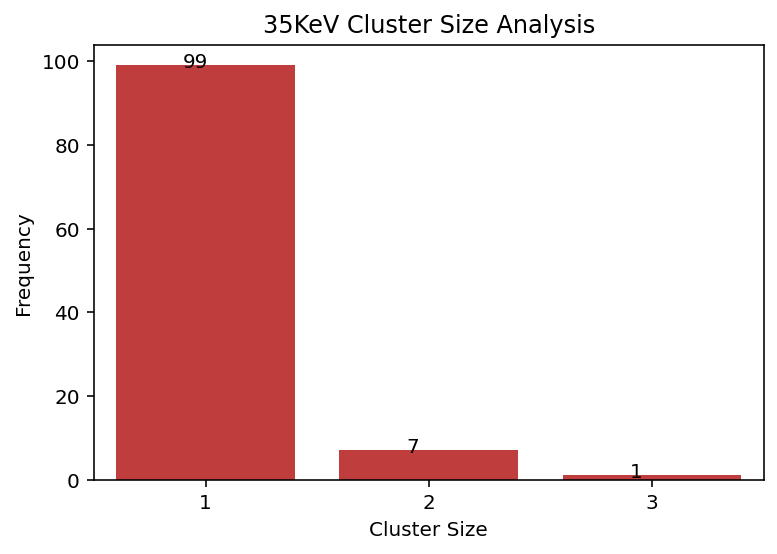

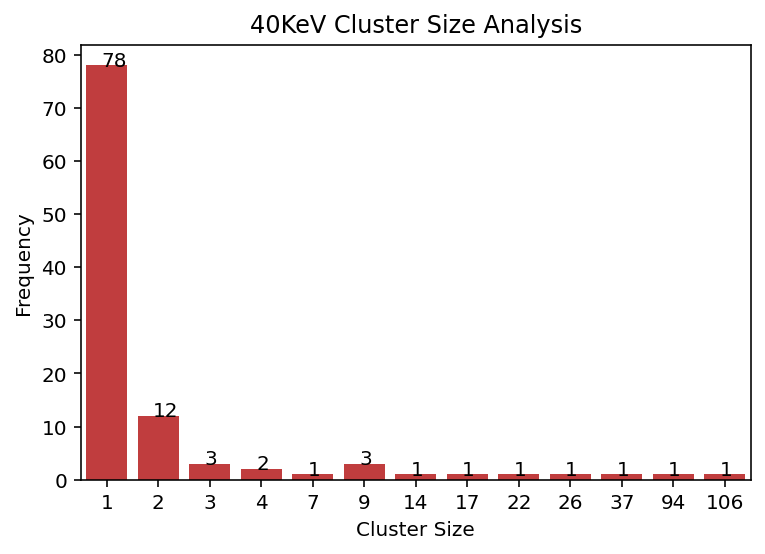

In [ ]:
dir='/content/drive/MyDrive/research/100_frame_clusters/'
%cd '/content/drive/MyDrive/research/graphs/IV_cluster'
results_dic={}
folders=listdir(dir) 
def convert(str):
    return int("".join(re.findall("\d", str)))                    
folders.sort(key=convert)                                                               #rearrange folders in ascending order
# folders
val=[x for x in listdir(dir+folders[0]) if int("".join(re.findall("\d", x))) ==100]     #select 100 frame file from folder to analyze
val[0]
for idx in range(0,len(folders),1):
  folders2=listdir(dir+folders[idx])
  folders2.sort(key=convert)
# print(idx)
# folders2
  for file in folders2:  
    if file == val[0]:
      with open(dir+folders[idx]+'/'+file,'r') as rt:
        x=[int(float(x)) for x in rt if float(x)>0] 
        results_dic[idx]=results_dic.get(idx,x) 
L=results_dic[9]
val = list(zip(*np.unique(L, return_counts=True)))          #count frequency of data (data,frequency)
ylb=[y for x,y in val]                                      #take the frequency NB: whichbecomes the ylabel of graph

def graph(data,a,folders=folders):
  base=sb.color_palette()[3]
  # ax=plt.subplots(figsize=(6,4));
  # plt.subplot(2,4,i+1)
  sb.countplot(data=data,x=a,color=base);
  plt.xlabel('Cluster Size')
  plt.ylabel('Frequency')
  plt.title(folders[a].split('_')[0]+' Cluster Size Analysis') #take the (*KeV section) of of the folder for naming graph
  L=results_dic[a]
  val = list(zip(*np.unique(L, return_counts=True)))          #count frequency of data (data,frequency)
  ylb=[y for x,y in val]                                      #take the frequency NB: whichbecomes the ylabel of graph
  for i in range(len(ylb)):                                   #loop through frequency 
    plt.text(i-0.1,ylb[i]+0.9, str(ylb[i]),va='center')         #label the bar charts 
  plt.savefig('Cluster_Size_Analysis_{:.0f}_.png'.format(a),dpi=2000)
  plt.show()
  return None
for i in range(10):
  graph(results_dic,i)

/content/drive/MyDrive/research/graphs


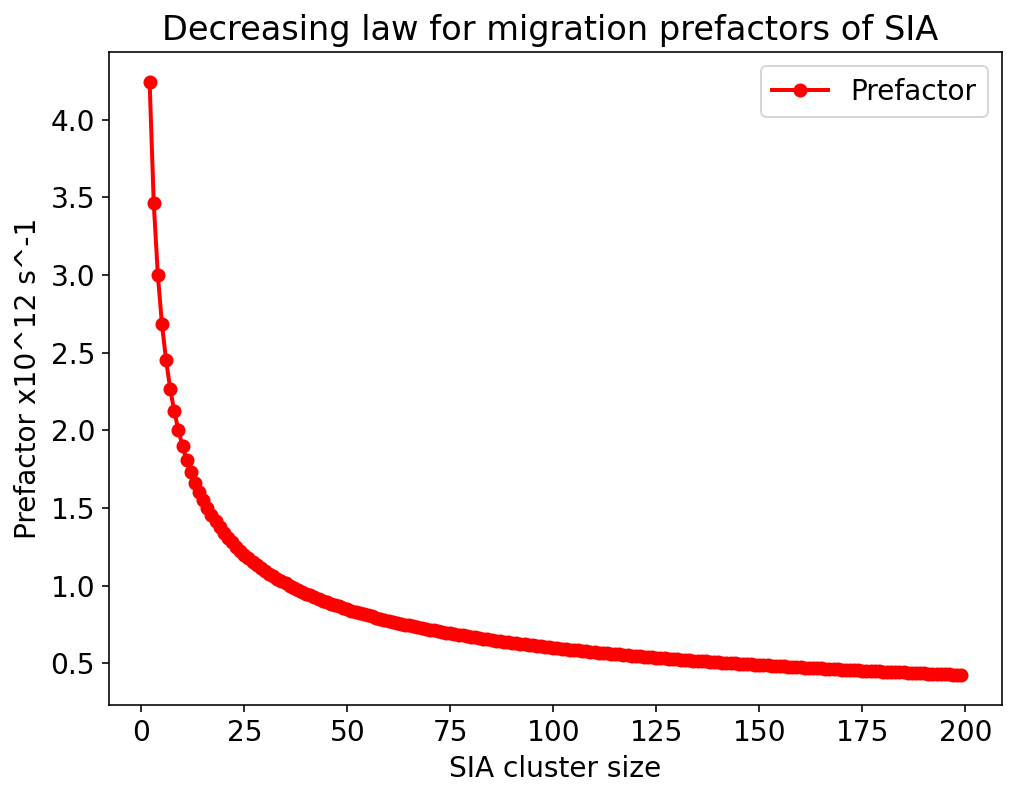

In [ ]:
%cd '/content/drive/MyDrive/research/graphs'
x=np.arange(2,200,1)
y=[y for y in 6*np.power(x,-0.5)]
plt.rcParams.update({'font.size': 14})
fig, ax =plt.subplots(figsize=(8,6))
ax.plot(x,y, linewidth=2,marker='o', label='Prefactor',color='r')
ax.set_xlabel('SIA cluster size')
ax.set_ylabel('Prefactor x10^12 s^-1')
ax.set_title( 'Decreasing law for migration prefactors of SIA ')
ax.legend(facecolor ='white')
plt.savefig('Decreasing power law for SIA.png',dpi=2000)
plt.show()

/content/drive/MyDrive/research/graphs


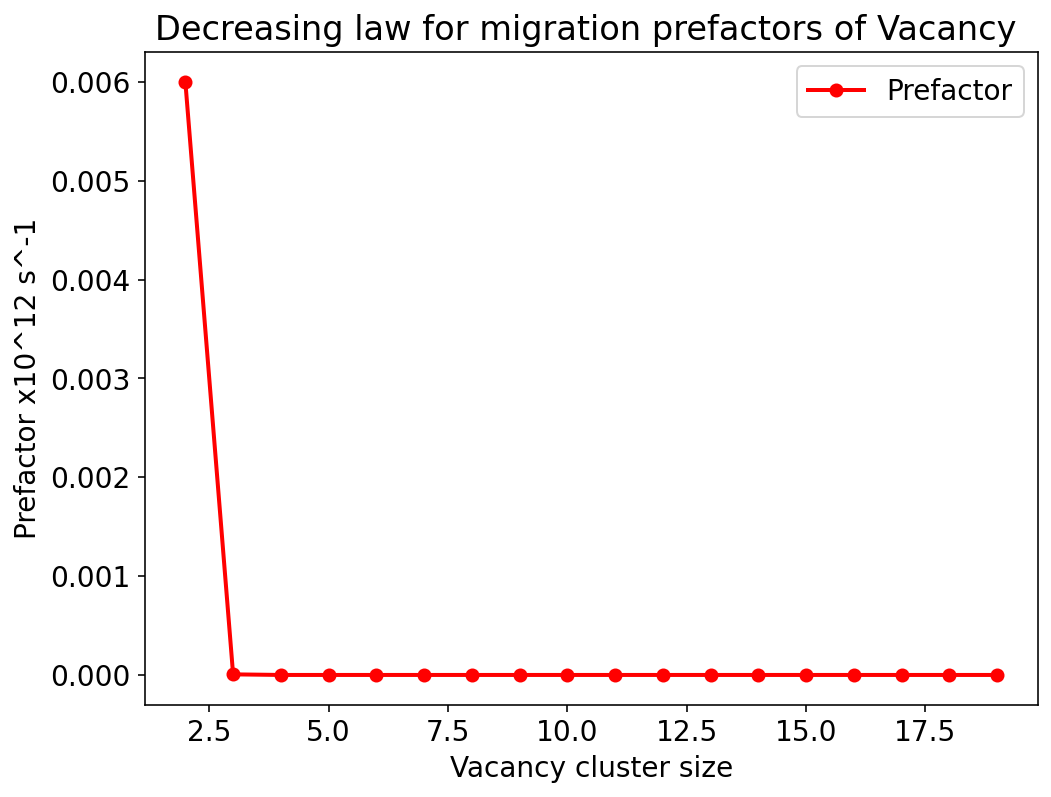

In [ ]:
%cd '/content/drive/MyDrive/research/graphs'
x=np.arange(2,20,1)
y=[y for y in 6*np.power(0.001,(x-1))]
plt.rcParams.update({'font.size': 14})
fig, ax =plt.subplots(figsize=(8,6))
ax.plot(x,y, linewidth=2,marker='o', label='Prefactor',color='r')
ax.set_xlabel('Vacancy cluster size')
ax.set_ylabel('Prefactor x10^12 s^-1')
ax.set_title( 'Decreasing law for migration prefactors of Vacancy ')
ax.legend(facecolor ='white')
plt.savefig('Decreasing power law for vacancy.png',dpi=2000)
plt.show()

/content/drive/MyDrive/research/graphs


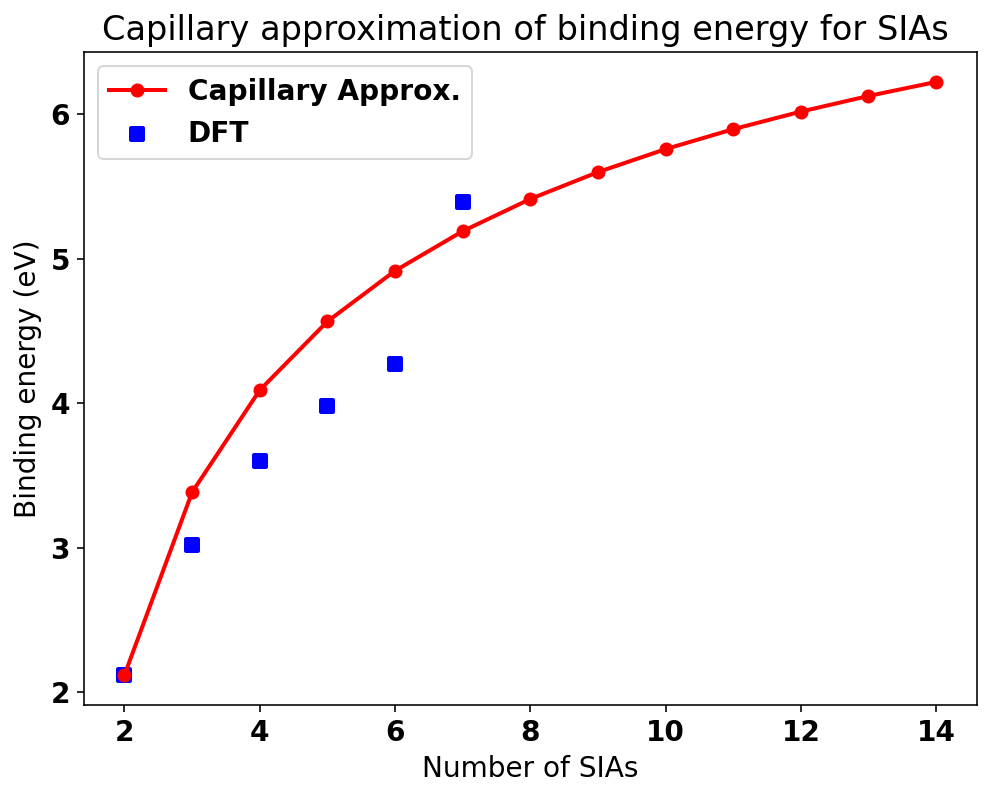

In [ ]:
%cd '/content/drive/MyDrive/research/graphs'
x=np.arange(2,8,1)
y=[2.12,3.02,3.6,3.98,4.27,5.39]
xx=np.arange(2,15,1)
cal=9.96+(2.12-9.96)*(np.power(xx,(2/3))-np.power((xx-1),2/3))/(np.power(2,2/3)-1)
yy=[y for y in cal]
plt.rcParams.update({'font.size': 14,'font.weight':'bold'})
fig, ax =plt.subplots(figsize=(8,6))
ax.scatter(x,y, linewidth=2,marker='s', label='DFT',color='b')
ax.plot(xx,yy, linewidth=2,marker='o', label='Capillary Approx.',color='r')
ax.set_xlabel('Number of SIAs')
ax.set_ylabel('Binding energy (eV)')
ax.set_title( 'Capillary approximation of binding energy for SIAs ')
ax.legend(facecolor ='white',loc='upper left')
# plt.savefig('Capillary approximation of binding energy for SIAs',dpi=2000)
plt.show()

/content/drive/MyDrive/research/graphs


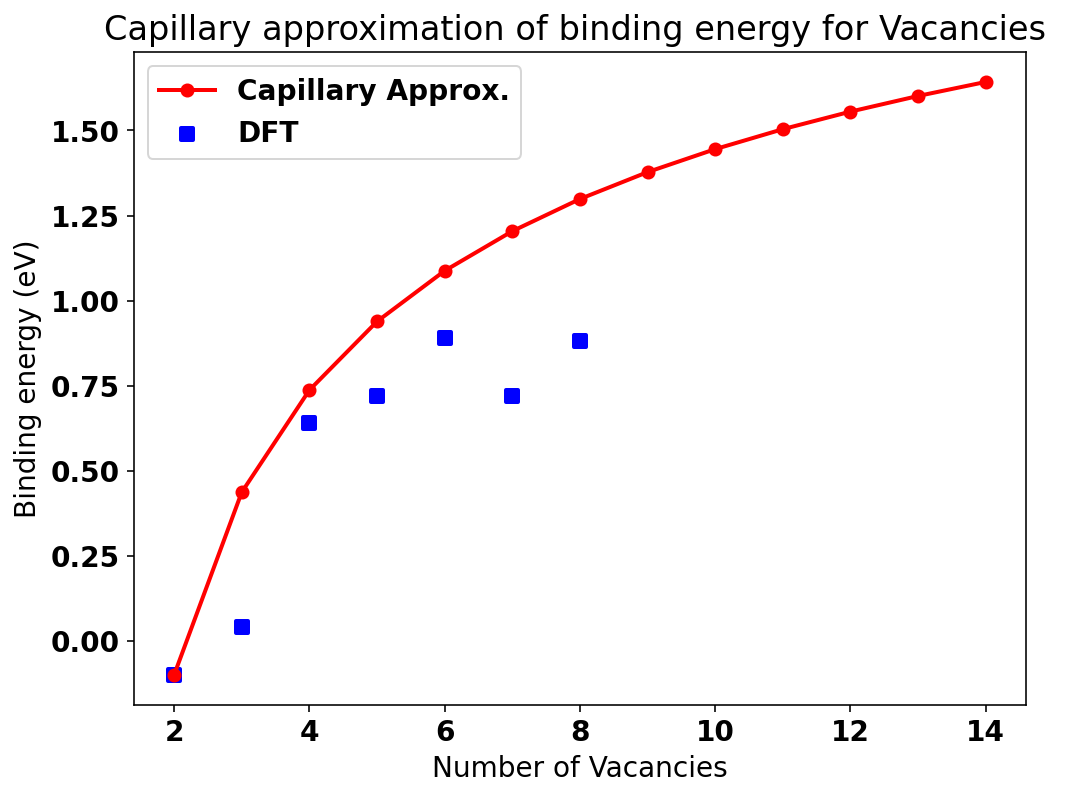

In [ ]:
%cd '/content/drive/MyDrive/research/graphs'
x=np.arange(2,9,1)
y=[-0.1,0.04,0.64,0.72,0.89,0.72,0.88]
xx=np.arange(2,15,1)
cal=3.23+(-0.1-3.23)*(np.power(xx,(2/3))-np.power((xx-1),2/3))/(np.power(2,2/3)-1)
yy=[y for y in cal]
plt.rcParams.update({'font.size': 14,'font.weight':'bold'})
fig, ax =plt.subplots(figsize=(8,6))
ax.scatter(x,y, linewidth=2,marker='s', label='DFT',color='b')
ax.plot(xx,yy, linewidth=2,marker='o', label='Capillary Approx.',color='r')
ax.set_xlabel('Number of Vacancies')
ax.set_ylabel('Binding energy (eV)')
ax.set_title( 'Capillary approximation of binding energy for Vacancies ')
ax.legend(facecolor ='white',loc='upper left')
# plt.savefig('Capillary approximation of binding energy for Vacancies',dpi=2000)
plt.show()

/content/drive/MyDrive/research/graphs


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


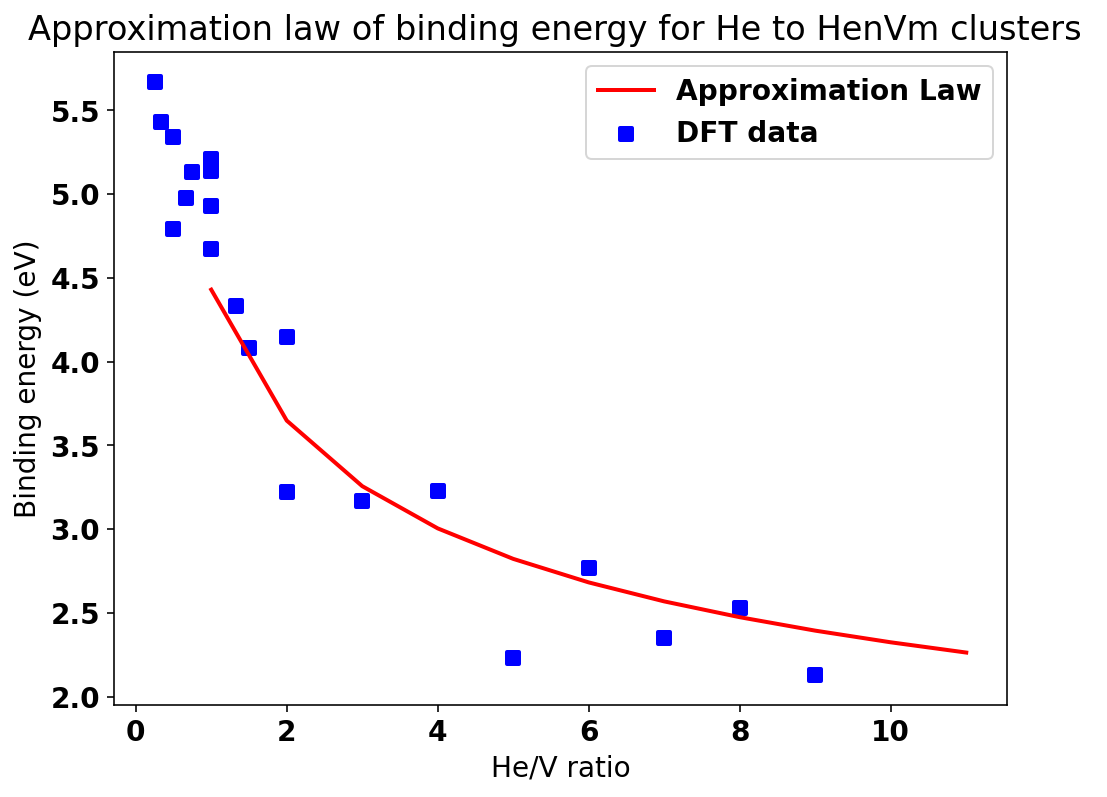

In [ ]:
%cd '/content/drive/MyDrive/research/graphs'
data=[(1,4.67),(2,3.22),(3,3.17),(4,3.23),(5,2.23),(6,2.77),(7,2.35),(8,2.53),(9,2.13),(0.5,4.79),(1,4.93),(1.5,4.08),(2,4.15),(0.33,5.43),(0.66,4.98),(1,5.14),(1.33,4.33),(0.25,5.67),(0.5,5.34),(0.75,5.130),(1,5.21)] 
x=[x for x,y in data]
y=[y for x,y in data]
xx=np.arange(-1,12,1)
yy=[y for y in 4.43*np.power(xx,-0.28)]
# print(x)
plt.rcParams.update({'font.size': 14,'font.weight':'bold'})
fig, ax =plt.subplots(figsize=(8,6))
ax.scatter(x,y, linewidth=2,marker='s', label='DFT data',color='b')
ax.plot(xx,yy, linewidth=2, label='Approximation Law',color='r')
ax.set_xlabel('He/V ratio')
ax.set_ylabel('Binding energy (eV)')
ax.set_title( 'Approximation law of binding energy for He to HenVm clusters ')
ax.legend(facecolor ='white',loc='upper right')
plt.savefig('Approximation law of binding energy for He to HenVm clusters',dpi=2000)
plt.show()

In [ ]:
w=9,3

In [ ]:
import numpy as np

In [ ]:
#intersatitial capture radius m>1
%cd '/content/drive/MyDrive/research/graphs'
x1=np.arange(2,100,1)
y1=[x1*2.3 for x1 in 1.15*(3.17+np.power(((x1*3*np.power(3.17,3))/(np.pi*2*4)),1/3)-np.power(((3*np.power(3.17,3))/(np.pi*2*4)),1/3))]

/content/drive/MyDrive/research/graphs


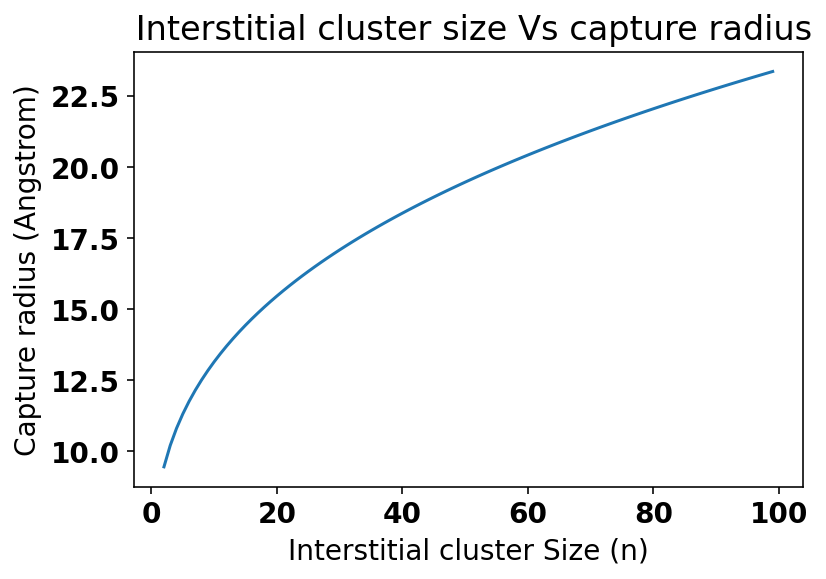

In [ ]:
sb.lineplot(x=x1,y=y1);
plt.rcParams.update({'font.size': 14,'font.weight':'bold'})
plt.xlabel('Interstitial cluster Size (n)');
plt.ylabel('Capture radius (Angstrom)');
plt.title(' Interstitial cluster size Vs capture radius');
plt.savefig('Interstitial cluster size Vs capture radius',dpi=2000)

In [ ]:
y1

[9.45770056982297,
 10.210420377636847,
 10.80965957034462,
 11.315694232278087,
 11.758027100882149,
 12.153568778526349,
 12.51302117369668,
 12.843636920263586]

In [ ]:
np.average(y1)

11.382716090431412

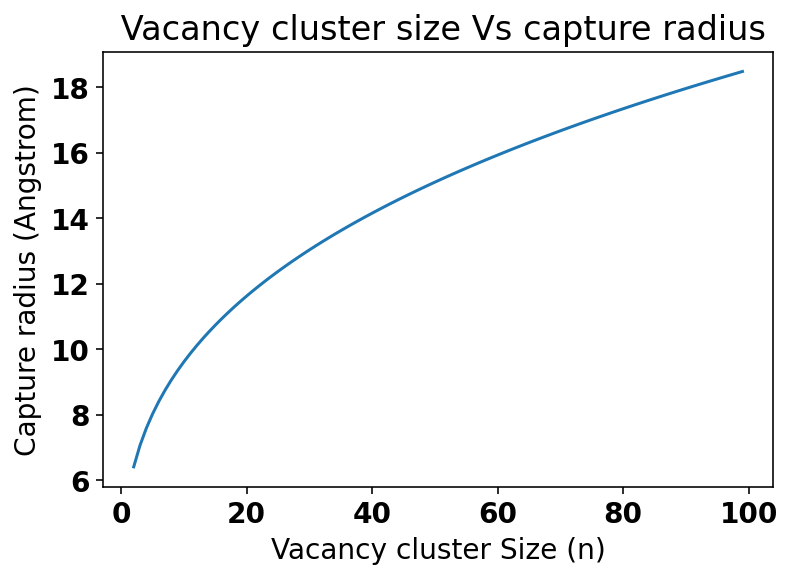

In [ ]:
# vacancy capture radius m>1
x2=np.arange(2,100,1)
y2=[x2*2.3 for x2 in 2.3775+np.power(((x2*3*np.power(3.17,3))/(np.pi*2*4)),1/3)-np.power(((3*np.power(3.17,3))/(np.pi*2*4)),1/3)]
plt.rcParams.update({'font.size': 14,'font.weight':'bold'})
sb.lineplot(x=x2,y=y2);
plt.xlabel('Vacancy cluster Size (n)');
plt.ylabel('Capture radius (Angstrom)');
plt.title(' Vacancy cluster size Vs capture radius');
plt.savefig('Vacancy cluster size Vs capture radius',dpi=2000)

In [ ]:
y2

In [ ]:
np.average(y2)

8.075263991679488

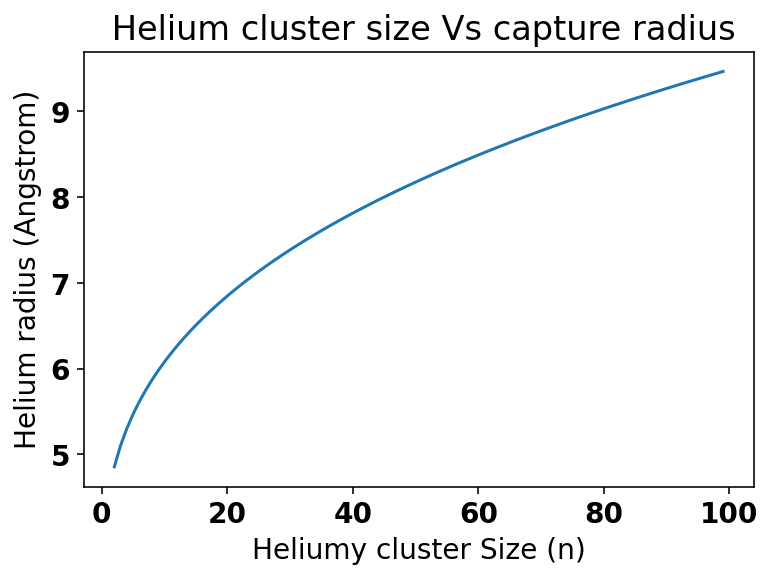

In [ ]:
# helium capture radius m>1
x3=np.arange(2,100,1)
y3=[x3*1.5 for x3 in 3+np.power(((x3*3*np.power(3.17,3))/(np.pi*10*4)),1/3)-np.power(((3*np.power(3.17,3))/(np.pi*10*4)),1/3)]
sb.lineplot(x=x3,y=y3)
plt.xlabel('Heliumy cluster Size (n)');
plt.ylabel('Helium radius (Angstrom)');
plt.title(' Helium cluster size Vs capture radius');
plt.savefig('Helium cluster size Vs capture radius',dpi=2000)

In [ ]:
y3

/content/drive/MyDrive/research/graphs/IV_cluster


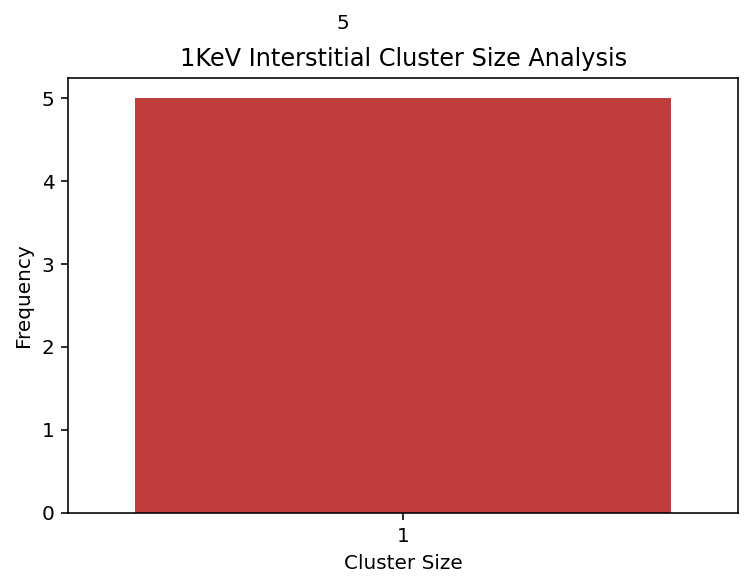

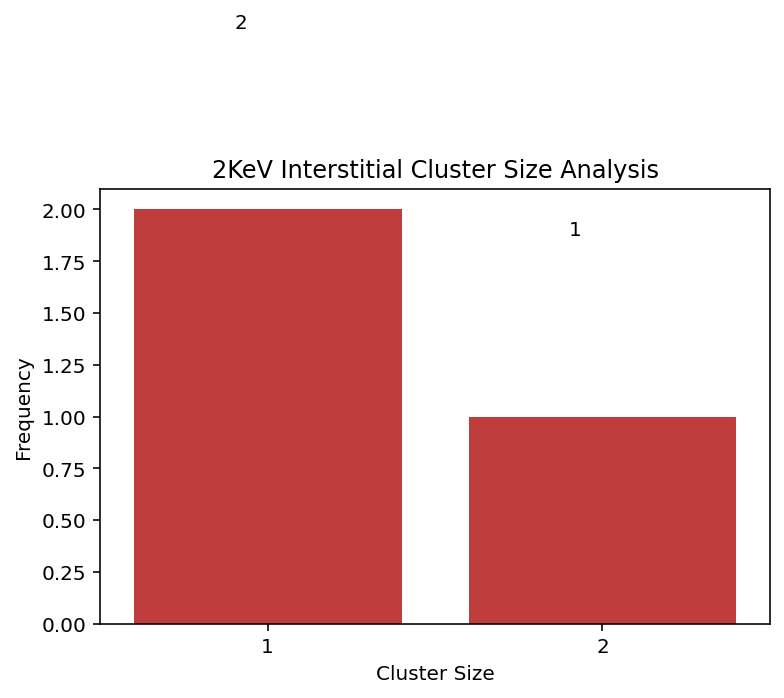

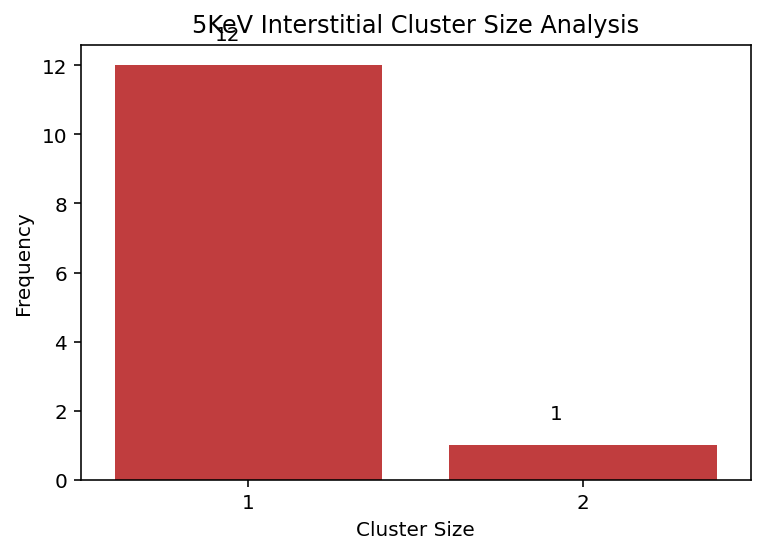

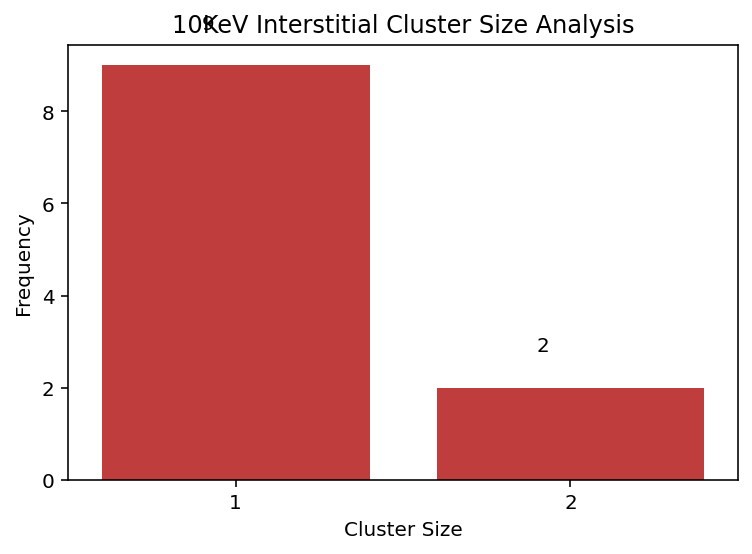

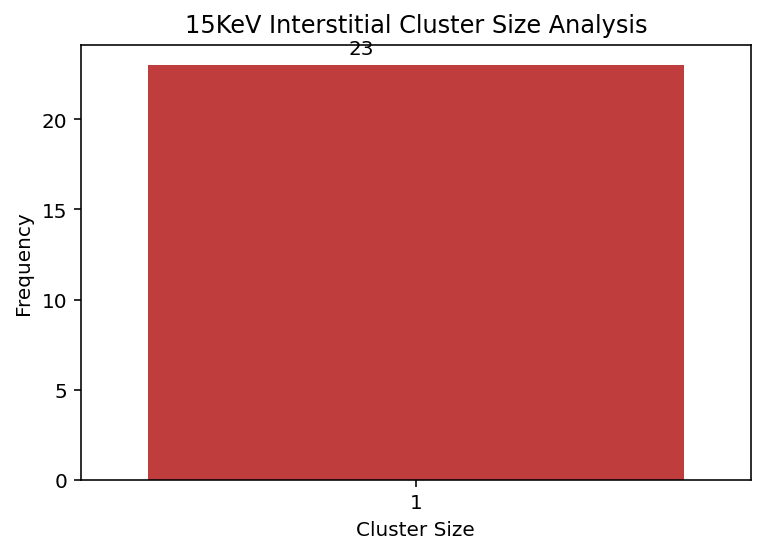

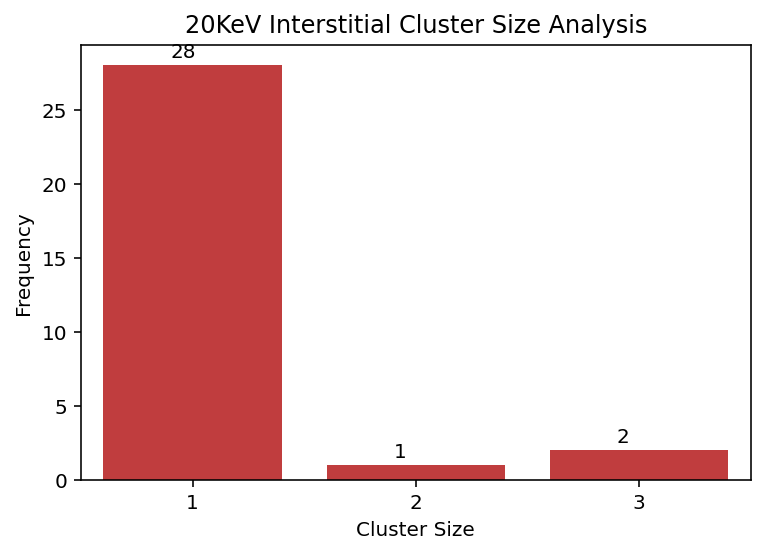

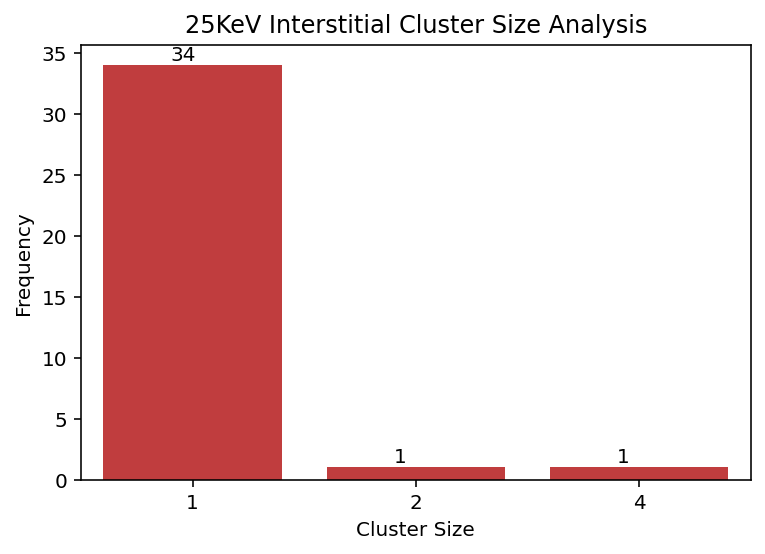

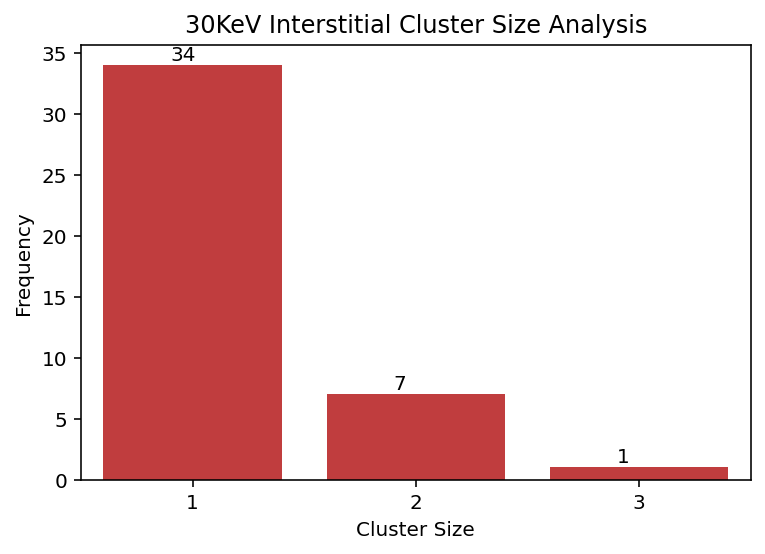

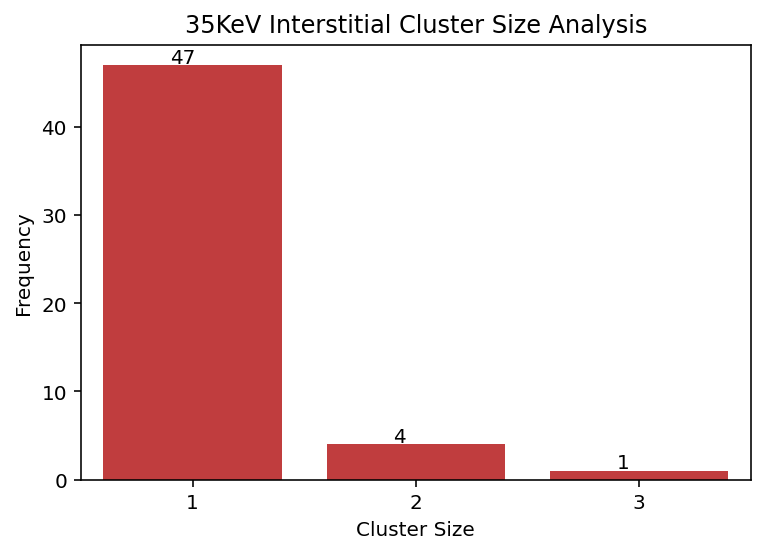

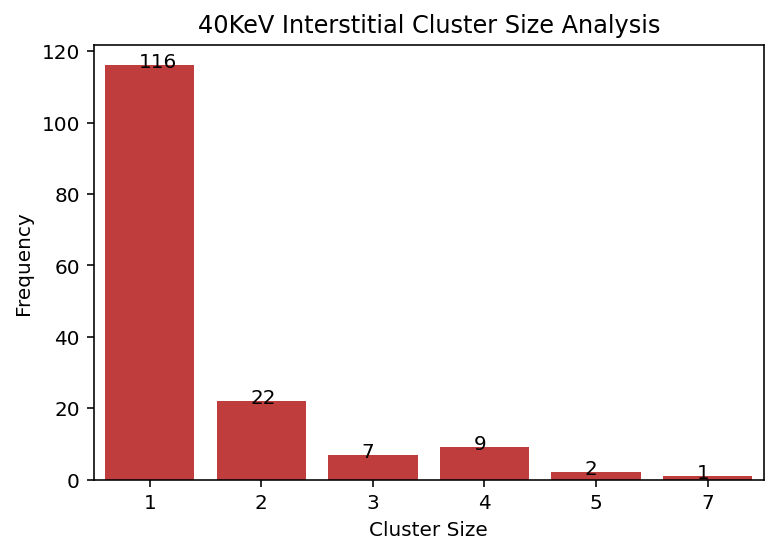

In [ ]:
dir='/content/drive/MyDrive/research/IVclusters/I_clusters/'
%cd '/content/drive/MyDrive/research/graphs/IV_cluster'
results_dic={}
folders=listdir(dir) 
def convert(str):
    return int("".join(re.findall("\d", str)))                    
folders.sort(key=convert)                                                               #rearrange folders in ascending order
# folders
val=[x for x in listdir(dir+folders[0]) if int("".join(re.findall("\d", x))) ==100]     #select 100 frame file from folder to analyze
val[0]
for idx in range(0,len(folders),1):
  folders2=listdir(dir+folders[idx])
  folders2.sort(key=convert)
# print(idx)
# folders2
  for file in folders2:  
    if file == val[0]:
      with open(dir+folders[idx]+'/'+file,'r') as rt:
        x=[int(float(x)) for x in rt if float(x)>0] 
        results_dic[idx]=results_dic.get(idx,x) 
L=results_dic[9]
val = list(zip(*np.unique(L, return_counts=True)))          #count frequency of data (data,frequency)
ylb=[y for x,y in val]                                      #take the frequency NB: whichbecomes the ylabel of graph

def graph(data,a,folders=folders):
  base=sb.color_palette()[3]
  # ax=plt.subplots(figsize=(6,4));
  # plt.subplot(2,4,i+1)
  sb.countplot(data=data,x=a,color=base);
  plt.xlabel('Cluster Size')
  plt.ylabel('Frequency')
  plt.title(folders[a].split('_')[0]+' Interstitial Cluster Size Analysis') #take the (*KeV section) of of the folder for naming graph
  L=results_dic[a]
  val = list(zip(*np.unique(L, return_counts=True)))          #count frequency of data (data,frequency)
  ylb=[y for x,y in val]                                      #take the frequency NB: whichbecomes the ylabel of graph
  for i in range(len(ylb)):                                   #loop through frequency 
    plt.text(i-0.1,ylb[i]+0.9, str(ylb[i]),va='center')         #label the bar charts 
  plt.savefig('Cluster_Size_Analysis_{:.0f}_.png'.format(a),dpi=2000)
  plt.show()
  return None
for i in range(10):
  graph(results_dic,i)

/content/drive/MyDrive/research/graphs/IV_cluster


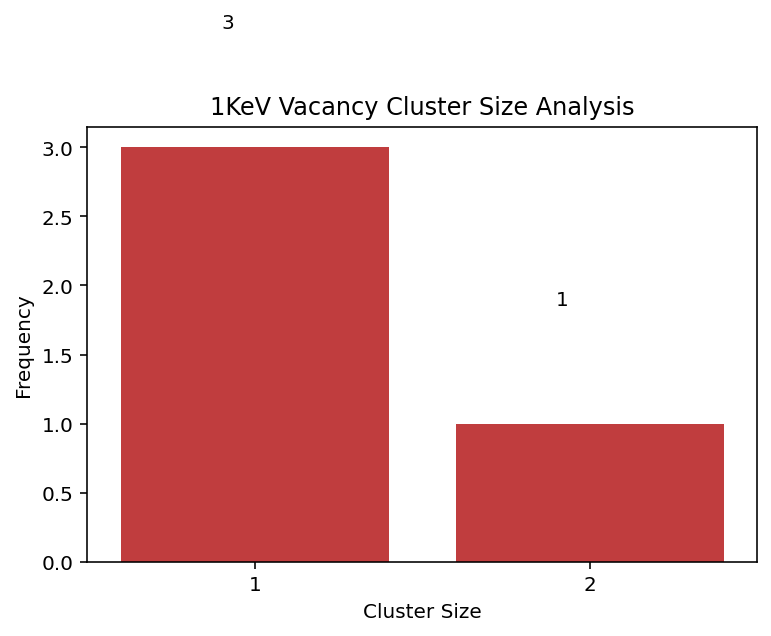

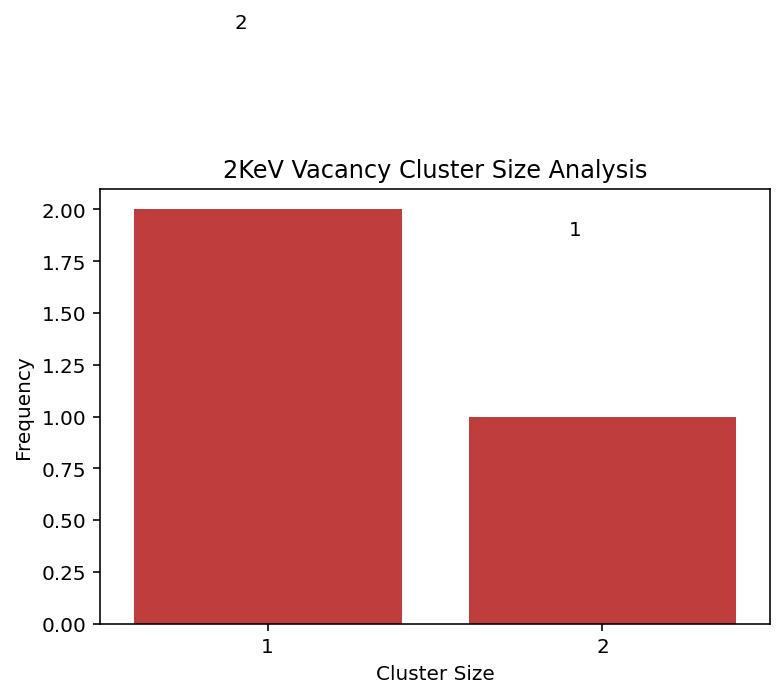

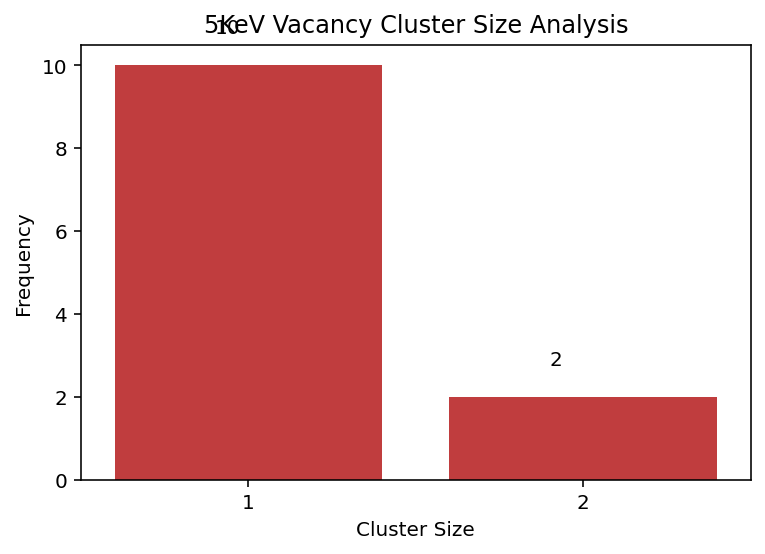

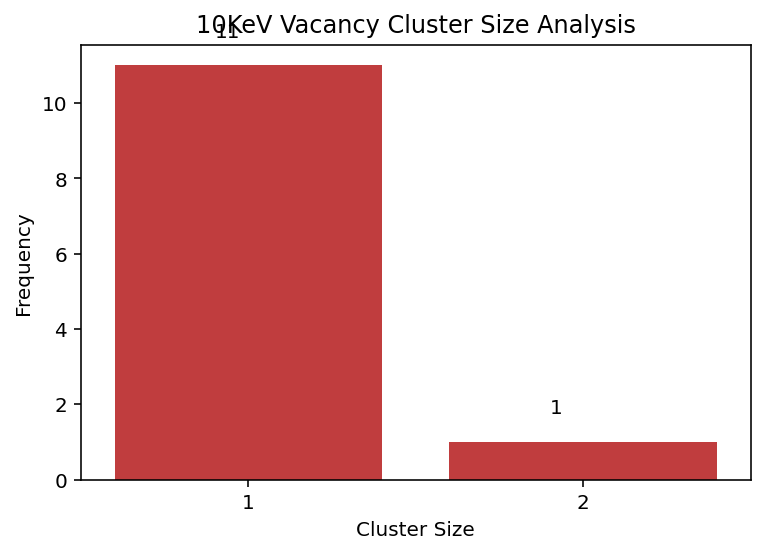

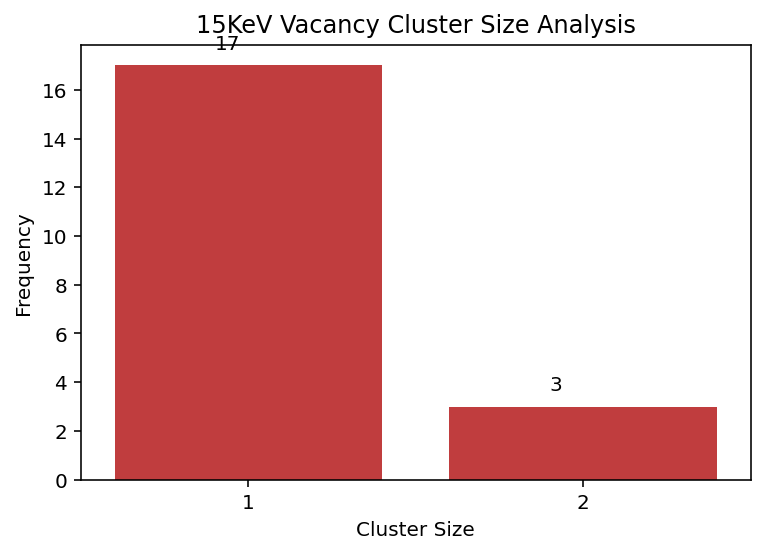

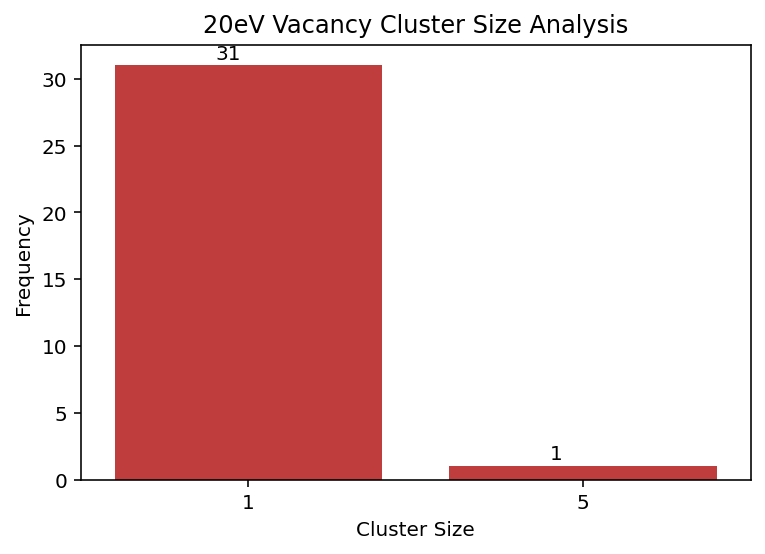

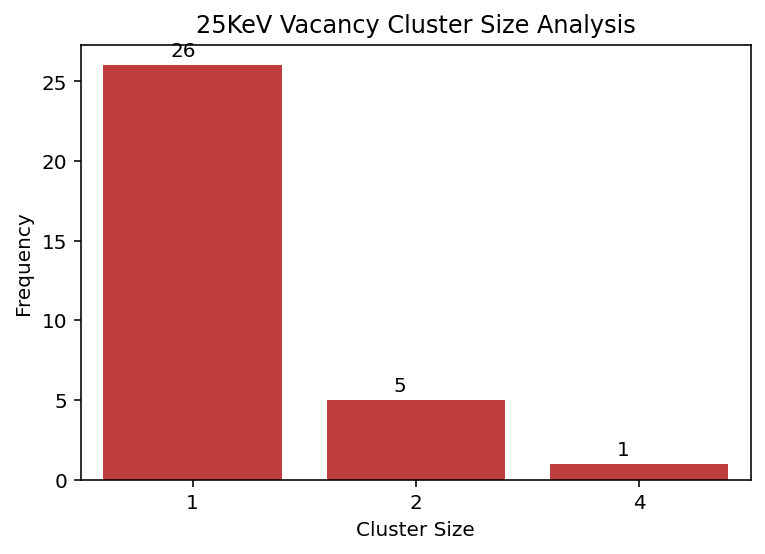

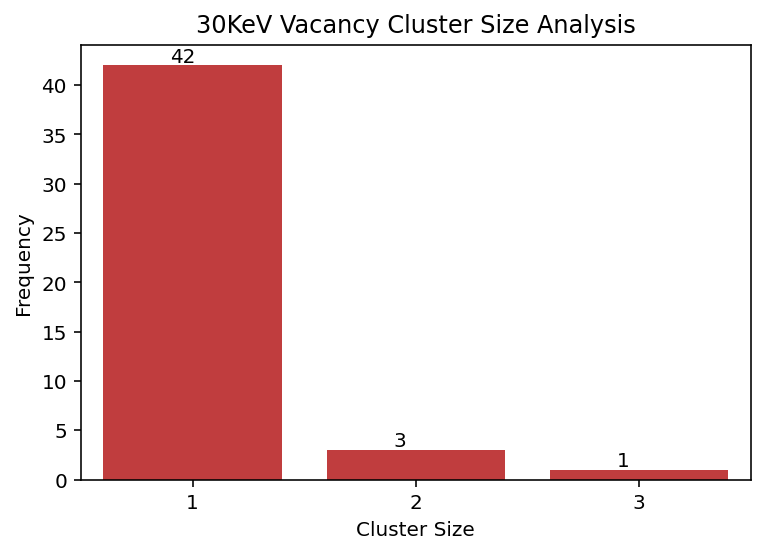

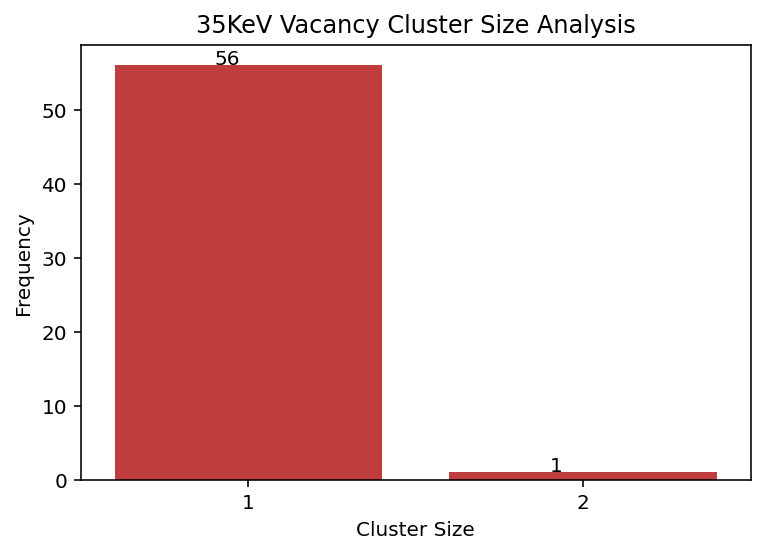

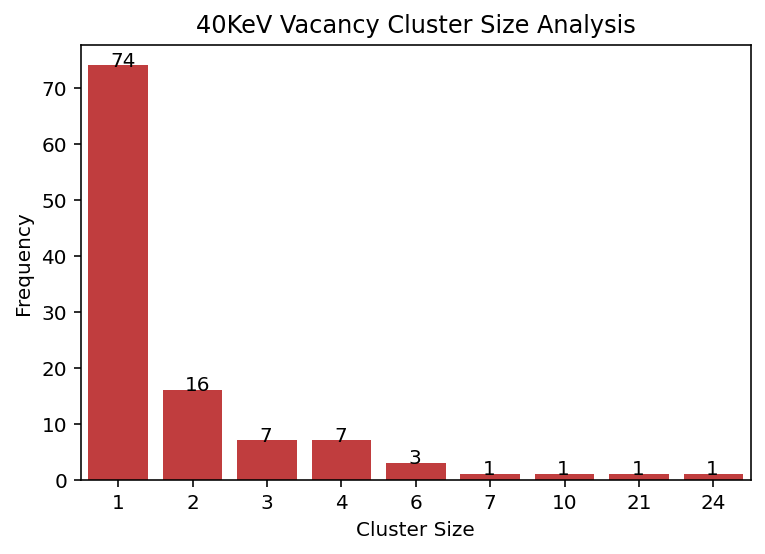

In [ ]:
dir='/content/drive/MyDrive/research/IVclusters/V_clusters/'
%cd '/content/drive/MyDrive/research/graphs/IV_cluster'
results_dic={}
folders=listdir(dir) 
def convert(str):
    return int("".join(re.findall("\d", str)))                    
folders.sort(key=convert)                                                               #rearrange folders in ascending order
# folders
val=[x for x in listdir(dir+folders[0]) if int("".join(re.findall("\d", x))) ==100]     #select 100 frame file from folder to analyze
val[0]
for idx in range(0,len(folders),1):
  folders2=listdir(dir+folders[idx])
  folders2.sort(key=convert)
# print(idx)
# folders2
  for file in folders2:  
    if file == val[0]:
      with open(dir+folders[idx]+'/'+file,'r') as rt:
        x=[int(float(x)) for x in rt if float(x)>0] 
        results_dic[idx]=results_dic.get(idx,x) 
L=results_dic[9]
val = list(zip(*np.unique(L, return_counts=True)))          #count frequency of data (data,frequency)
ylb=[y for x,y in val]                                      #take the frequency NB: whichbecomes the ylabel of graph

def graph(data,a,folders=folders):
  base=sb.color_palette()[3]
  # ax=plt.subplots(figsize=(6,4));
  # plt.subplot(2,4,i+1)
  sb.countplot(data=data,x=a,color=base);
  plt.xlabel('Cluster Size')
  plt.ylabel('Frequency')
  plt.title(folders[a].split('_')[0]+' Vacancy Cluster Size Analysis') #take the (*KeV section) of of the folder for naming graph
  L=results_dic[a]
  val = list(zip(*np.unique(L, return_counts=True)))          #count frequency of data (data,frequency)
  ylb=[y for x,y in val]                                      #take the frequency NB: whichbecomes the ylabel of graph
  for i in range(len(ylb)):                                   #loop through frequency 
    plt.text(i-0.1,ylb[i]+0.9, str(ylb[i]),va='center')         #label the bar charts 
  plt.savefig('Cluster_Size_Analysis_{:.0f}_.png'.format(a),dpi=2000)
  plt.show()
  return None
for i in range(10):
  graph(results_dic,i)